In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tienda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stop = stopwords.words('spanish')
stop

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [5]:
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, Flatten
from keras.datasets import imdb


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [7]:
class LemmaTokenizer:
    def __init__(self):
        self.nlp = spacy.load("es_core_news_sm")
    def __call__(self, doc):
        doc = self.nlp(doc)
        tokens = []
        for token in doc:
            lexeme = self.nlp.vocab[token.text]
            if lexeme.is_stop == False and not lexeme.is_punct and token.text.isalnum():
                tokens.append(token.lemma_)
        return tokens

In [8]:
# df_mini = pd.read_csv("../label_dataset.csv", sep=";", index_col=0, parse_dates=["date"])

In [9]:
# df_mini = df_mini[df_mini['label'] != 0]
# print(df_mini.shape)
# df_mini

In [10]:
# df_mini['texto_limpio'] = df_mini['body'].apply(
#     lambda x: ' '.join(
#         [word.lower() for word in x.split() 
#         if word.lower() not in (stop) and word.isalnum()]
#         )
#     )
# df_mini.head(4)

In [11]:
# df_mini.to_csv('../texto_limpio.csv')

In [12]:
# df_mini = pd.read_csv('gs://tfm_aideas_datasets/texto_limpio.csv', index_col = 'Unnamed: 0', parse_dates=["date"])
df_mini = pd.read_csv('../texto_limpio.csv', index_col = 'Unnamed: 0', parse_dates=["date"])
df_mini

,ticker,date,body,r_adj,label,texto_limpio
6,ANA,2021-01-07 08:29:03.000,"El Ibex 35 ha tocado por momentos los 8.400, n...",0.050625,1,ibex 35 tocado momentos niveles veía marzo ini...
7,ANA,2021-01-07 10:28:03.000,"El presidente de Estados Unidos, Joe Biden, se...",0.012283,1,presidente joe hecho control dos cámaras congr...
8,ANA,2021-01-07 12:21:00.000,"MADRID, 7 Ene. (EUROPA PRESS) - El Ibex 35 caí...",0.012283,1,7 ibex 35 caía media sesión llevaba selectivo ...
9,ANA,2021-01-07 14:35:00.000,"HUELVA, 7 Ene. (EUROPA PRESS) - Las obras de a...",0.012283,1,7 obras adecuación desdoble carretera acceso m...
10,ANA,2021-01-07 15:28:06.000,El asalto al capitolio no ha asus...,0.012283,1,asalto capitolio asustado principales índices ...
...,...,...,...,...,...,...
53473,TEF,2021-12-30 06:13:41.000,"“Todos tendrán su baja, tal y como se ha hecho...",-0.019280,-1,tal hecho principio mensaje tranquilizador dab...
53474,TEF,2021-12-30 08:27:05.000,La última sesión del año en la Bolsa española ...,-0.019280,-1,última sesión año bolsa española transcurrido ...
53475,TEF,2021-12-30 08:31:09.000,17:46La Comunidad Valenciana notifica 10.889 n...,-0.019280,-1,comunidad valenciana notifica nuevos contagios...
53476,TEF,2021-12-30 08:52:26.000,19:12Compromís pide a Ximo Puig «evaluar todas...,-0.019280,-1,pide ximo puig todas posibles frente coronavir...


In [13]:
cv = CountVectorizer(lowercase=True, ngram_range = (1,1), tokenizer = LemmaTokenizer())

In [14]:
cv.fit(df_mini['texto_limpio'])

c:\Users\Tienda\Desktop\MasterIA\TFM\tfm-miax7\venv\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x000001C137405D90>)

In [15]:
vector = cv.transform(df_mini['texto_limpio'])

In [16]:
name_features = pd.DataFrame(vector.toarray(), columns=cv.get_feature_names(), index= df_mini.index)
name_features

c:\Users\Tienda\Desktop\MasterIA\TFM\tfm-miax7\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,tú él,0,00,000,0000,00000,0002,0015,00206,...,ús,útero,útil,útima,útimo,útlimo,şahin,μg,온,한국에서
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#name_features.to_csv('../name_features.csv')

In [18]:
# name_features = pd.read_csv('gs://tfm_aideas_datasets/name_features.csv', index_col='Unnamed: 0', parse_dates=["date"])
# name_features = pd.read_csv('../name_features.csv', index_col='Unnamed: 0', parse_dates=["date"])

In [19]:
lb = LabelEncoder()
labels = lb.fit_transform(df_mini.label)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
            name_features.values, labels, test_size=0.33
        )

In [21]:
# name_features = pd.read_csv('gs://tfm_aideas_datasets/name_features.csv', index_col='Unnamed: 0', parse_dates=["date"])
name_features = pd.read_csv('../name_features.csv', index_col='Unnamed: 0', parse_dates=["date"])

,,tú él,0,00,000,0000,00000,0002,0015,00206,...,ús,útero,útil,útima,útimo,útlimo,şahin,μg,온,한국에서
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
lb = LabelEncoder()
labels = lb.fit_transform(df_mini.label)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
            name_features.values, labels, test_size=0.33
        )

In [28]:
print(x_train.shape)
x_test.shape

(14298, 75758)


(7043, 75758)

In [22]:
idx_labels_pos = np.where(y_train == 1)
idx_labels_pos = idx_labels_pos[0]
len(idx_labels_pos)

7183

In [23]:
idx_labels_neg = np.where(y_train == 0)
idx_labels_neg = idx_labels_neg[0]
len(idx_labels_neg)

7115

In [24]:
idx_labels_pos,idx_labels_neg

(array([    0,     2,     3, ..., 14290, 14291, 14294], dtype=int64),
 array([    1,     5,     6, ..., 14295, 14296, 14297], dtype=int64))

In [25]:
sum_label_pos = np.sum(x_train[idx_labels_pos],axis=0)
sum_label_pos

array([ 0,  0, 43, ...,  1,  0,  0], dtype=int64)

In [26]:
len(sum_label_pos)

75758

In [27]:
sum_label_neg = np.sum(x_train[idx_labels_neg],axis=0)
sum_label_neg

array([ 0,  1, 49, ...,  0,  0,  0], dtype=int64)

In [28]:
#Multiplico pos * neg, las que queden a 0 serán las unicas
features_unique = sum_label_pos * sum_label_neg
features_unique

array([   0,    0, 2107, ...,    0,    0,    0], dtype=int64)

In [29]:
idx_features_unique = np.where(features_unique == 0)
idx_features_unique = idx_features_unique[0]
idx_features_unique

array([    0,     1,     5, ..., 75755, 75756, 75757], dtype=int64)

In [30]:
len(idx_features_unique)

46278

In [31]:
x_train_unique = x_train[:,idx_features_unique]
x_train_unique

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
x_train_unique.shape

(14298, 46278)

In [33]:
x_train_unique_sum = np.sum(x_train_unique, axis=0)
x_train_unique_sum

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
idx_train_unique_up100 = np.where(x_train_unique_sum > 10)
idx_train_unique_up100 = idx_train_unique_up100[0]
len(idx_train_unique_up100)

173

In [35]:
idx_train_unique_up100

array([ 1087,  1375,  1842,  1933,  2413,  2468,  2574,  3153,  4281,
        4549,  5069,  5392,  5577,  6099,  6120,  6721,  6758,  6783,
        6948,  6949,  7292,  7339,  7439,  7605,  7622,  8453,  8485,
        8744,  8852,  8973,  9008, 10026, 10632, 11006, 11607, 11924,
       12477, 12746, 12748, 12997, 13270, 13271, 14312, 14495, 14499,
       14524, 15253, 15334, 15533, 16039, 16054, 16150, 16343, 16452,
       16455, 16875, 17062, 17245, 17863, 18667, 18866, 19170, 19609,
       19863, 19985, 20182, 20663, 21046, 21102, 21215, 21302, 21308,
       21439, 21622, 21661, 22128, 22205, 22313, 22329, 22436, 23506,
       23629, 23630, 24213, 24440, 24764, 24784, 24793, 24873, 25508,
       25636, 25673, 25827, 25858, 26143, 27338, 27398, 27551, 27818,
       27999, 28215, 28953, 29075, 29207, 29546, 29730, 29735, 29816,
       29834, 30092, 30142, 30245, 30266, 30608, 30671, 30833, 30836,
       30983, 30988, 31376, 31483, 31633, 31700, 32230, 32994, 33354,
       33672, 34011,

In [36]:
x_train_unique_up100 = x_train_unique[:,idx_train_unique_up100]
x_train_unique_up100

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
x_train_unique_up100.shape

(14298, 173)

## Visualización PCA - Features sin estandarizar

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
weights = pca.fit_transform(x_train_unique_up100)

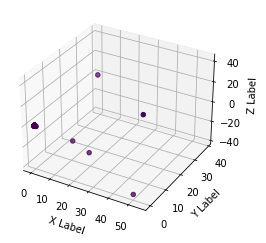

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

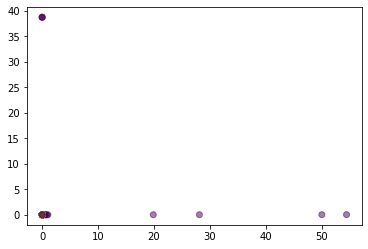

In [ ]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Visualización TSNE - Features sin estandarizar

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(x_train_unique_up100)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


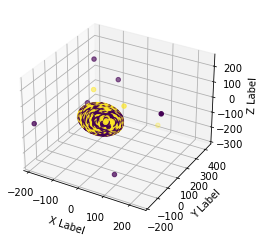

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

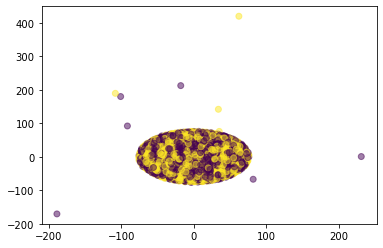

In [ ]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Estandarización features

In [ ]:
#####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_unique_up100)

In [40]:
#####
#x_test = scaler.transform(x_test)
#####

## Visualización PCA - Features estandarizadas

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
weights = pca.fit_transform(x_train)

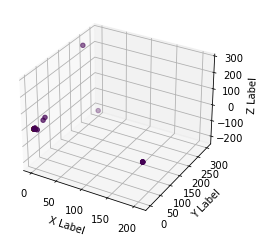

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

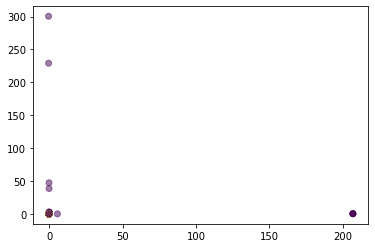

In [ ]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Visualización TSNE - Features estandarizadas

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(x_train)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


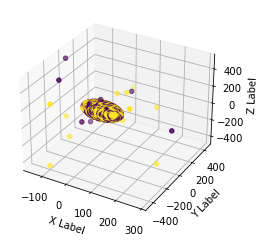

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

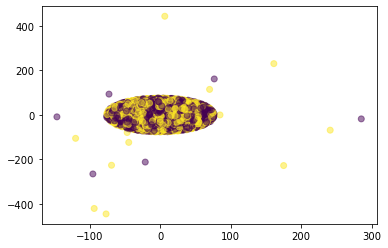

In [ ]:
x_train_unique_up100.shape

## Visualización PCA - Features sin estandarizar

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
weights = pca.fit_transform(x_train_unique_up100)

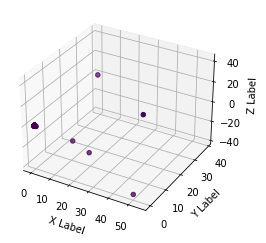

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

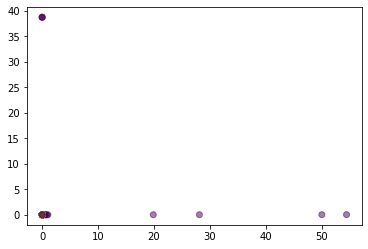

In [ ]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Visualización TSNE - Features sin estandarizar

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(x_train_unique_up100)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


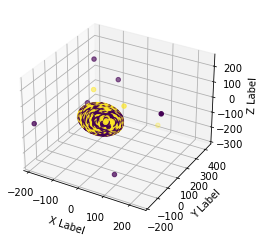

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

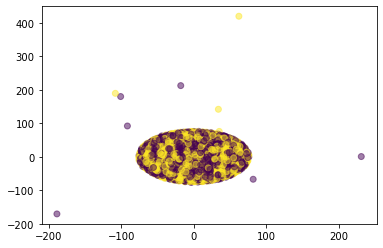

In [ ]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Estandarización features

In [ ]:
#####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_unique_up100)

In [ ]:
#####
x_test = scaler.transform(x_test)
#####

## Visualización PCA - Features estandarizadas

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
weights = pca.fit_transform(x_train)

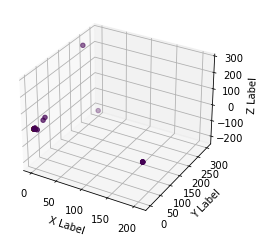

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

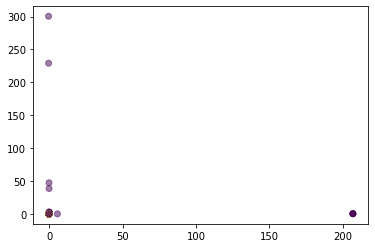

In [ ]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Visualización TSNE - Features estandarizadas

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(x_train)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


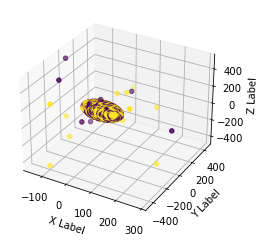

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

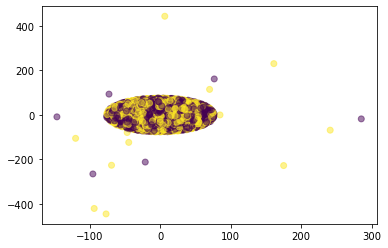

In [ ]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

In [41]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )

history = model.fit(x_train, y_train, epochs=50, batch_size=128,  validation_split=0.2)

Epoch 1/50
90/90 [==============================] - 61s 478ms/step - loss: 0.7096 - accuracy: 0.4983 - val_loss: 0.7106 - val_accuracy: 0.4993
Epoch 2/50
90/90 [==============================] - 38s 428ms/step - loss: 0.6964 - accuracy: 0.4990 - val_loss: 0.6994 - val_accuracy: 0.5021
Epoch 3/50
90/90 [==============================] - 23s 260ms/step - loss: 0.6887 - accuracy: 0.5095 - val_loss: 0.6929 - val_accuracy: 0.5105
Epoch 4/50
90/90 [==============================] - 21s 236ms/step - loss: 0.6847 - accuracy: 0.5122 - val_loss: 0.6893 - val_accuracy: 0.5122
Epoch 5/50
90/90 [==============================] - 20s 228ms/step - loss: 0.6827 - accuracy: 0.5104 - val_loss: 0.6865 - val_accuracy: 0.5133
Epoch 6/50
90/90 [==============================] - 20s 229ms/step - loss: 0.6813 - accuracy: 0.5073 - val_loss: 0.6845 - val_accuracy: 0.5136
Epoch 7/50
90/90 [==============================] - 20s 229ms/step - loss: 0.6803 - accuracy: 0.5153 - val_loss: 0.6829 - val_accuracy: 0.5140

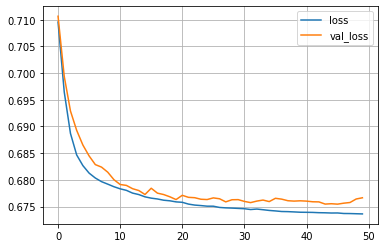

In [42]:
# plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

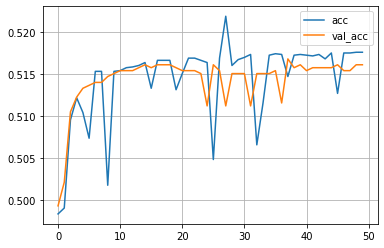

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.grid()
plt.show()

In [ ]:
# probar a ajustar los filtros de frecuencia > 10

In [ ]:
# probar otros scaler , otras activaciones

In [ ]:
# probar rehacer bidireccional

In [ ]:
# MODELO ATENCION : 

In [ ]:
# MODELO BERT : 
# limitacion textos 512
# que embedding preentrenado spanish utilizar